In [1]:
#!pip install opencv-python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from tensorflow.keras import datasets, layers, models

C:\Users\admin\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
(training_images,training_labels),(testing_images,testing_labels)=datasets.cifar10.load_data()

In [3]:
training_images.shape

(50000, 32, 32, 3)

In [4]:
testing_images.shape

(10000, 32, 32, 3)

# 3d array

In [5]:
training_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

C:\Users\admin\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[6]')

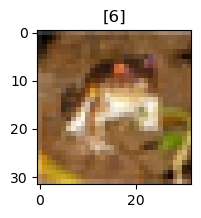

In [6]:
plt.figure(figsize=(15,2))
plt.imshow(training_images[0])
plt.title(training_labels[0])

In [7]:
6=="frog"

False

Text(0.5, 1.0, '[9]')

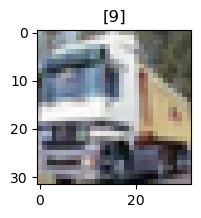

In [8]:
plt.figure(figsize=(15,2))
plt.imshow(training_images[1])
plt.title(training_labels[1])

In [9]:
9=="truck"

False

Text(0.5, 1.0, '[4]')

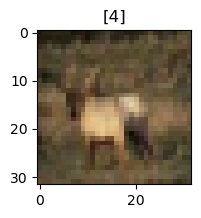

In [10]:
plt.figure(figsize=(15,2))
plt.imshow(training_images[3])
plt.title(training_labels[3])

In [11]:
4=="deer"

False

Text(0.5, 1.0, '[1]')

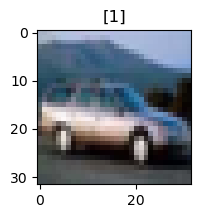

In [12]:
plt.figure(figsize=(15,2))
plt.imshow(training_images[4])
plt.title(training_labels[4])

In [13]:
1=="car"

False

Text(0.5, 1.0, '[2]')

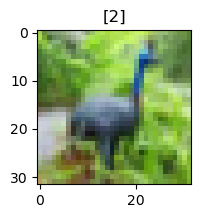

In [14]:
plt.figure(figsize=(15,2))
plt.imshow(training_images[6])
plt.title(training_labels[6])

In [15]:
2=="bird"

False

Text(0.5, 1.0, '[7]')

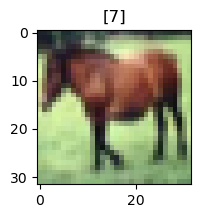

In [16]:
plt.figure(figsize=(15,2))
plt.imshow(training_images[7])
plt.title(training_labels[7])

In [17]:
7=="horse"

False

Text(0.5, 1.0, '[8]')

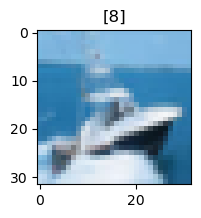

In [18]:
plt.figure(figsize=(15,2))
plt.imshow(training_images[8])
plt.title(training_labels[8])

In [19]:
8=="ship"

False

Text(0.5, 1.0, '[5]')

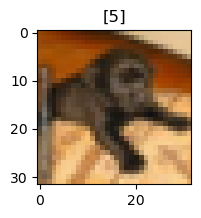

In [20]:
plt.figure(figsize=(15,2))
plt.imshow(training_images[56])
plt.title(training_labels[56])

In [21]:
5=="dog"

False

Text(0.5, 1.0, '[3]')

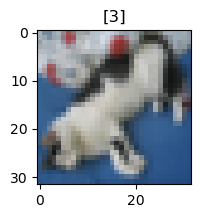

In [22]:
plt.figure(figsize=(15,2))
plt.imshow(training_images[548])
plt.title(training_labels[548])

In [23]:
3=="cat"

False

In [24]:
training_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [30]:
np.unique(training_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### will make training_labels in 1d(list)

In [31]:
training_labels=training_labels.reshape(-1,)
training_labels

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

### converting labels into datframe

In [32]:
df=pd.DataFrame(training_labels)

In [33]:
df.value_counts()

0
0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
Name: count, dtype: int64

In [34]:
clases=["airplanes","automobiles","bird","cat","deer","dog","frog","horse","ship","truck"]

In [35]:
clases[9]

'truck'

In [36]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(clases[y[index]])

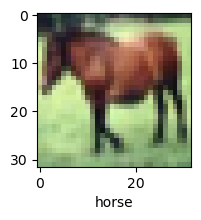

In [37]:
plot_sample(training_images,training_labels,7)

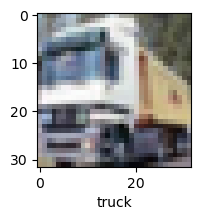

In [40]:
plot_sample(training_images,training_labels,1)

In [41]:
training_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [42]:
training_images,testing_images=training_images/255,testing_images/255

In [43]:
training_images

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# ANN

In [44]:
training_labels

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

## using SGD and sigmoid

In [46]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")])
ann.compile(optimizer="SGD",
           loss="sparse_categorical_crossentropy",metrics=["accuracy"])
ann.fit(training_images,training_labels,epochs=5)



Epoch 1/5


1563/1563 [==============================] - 96s 60ms/step - loss: 1.8094 - accuracy: 0.3549
Epoch 2/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.6218 - accuracy: 0.4286
Epoch 3/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.5415 - accuracy: 0.4577
Epoch 4/5
1563/1563 [==============================] - 84s 54ms/step - loss: 1.4802 - accuracy: 0.4812
Epoch 5/5
1563/1563 [==============================] - 88s 57ms/step - loss: 1.4326 - accuracy: 0.4959


## using SGD and softmax

In [154]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="softmax")])
ann.compile(optimizer="SGD",
           loss="sparse_categorical_crossentropy",metrics=["accuracy"])
ann.fit(training_images,training_labels,epochs=5)



Epoch 1/5
1563/1563 [==============================] - 92s 58ms/step - loss: 1.8166 - accuracy: 0.3525
Epoch 2/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.6248 - accuracy: 0.4241
Epoch 3/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.5426 - accuracy: 0.4540
Epoch 4/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4829 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.4354 - accuracy: 0.4936


C:\Users\admin\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[3]')

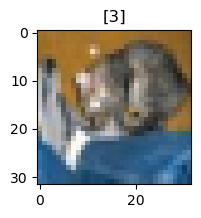

In [114]:
plt.figure(figsize=(15,2))
plt.imshow(testing_images[0])
plt.title(testing_labels[0])

Text(0.5, 1.0, '[9]')

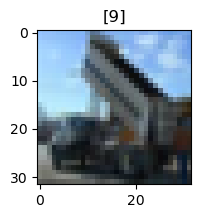

In [115]:
plt.figure(figsize=(15,2))
plt.imshow(testing_images[50])
plt.title(testing_labels[50])

In [155]:
test1=testing_images[0].reshape(-1,32,32,3)

In [156]:
# Make predictions
prediction2= ann.predict(test1)

1/1 [==============================] - 0s 87ms/step


In [157]:
predicted_classes = np.argmax(prediction2, axis=1)
predicted_classes

array([3], dtype=int64)

In [158]:
test2=testing_images[50].reshape(-1,32,32,3)

In [159]:
# Make predictions
prediction1= ann.predict(test2)

1/1 [==============================] - 0s 39ms/step


In [160]:
predicted_classes = np.argmax(prediction1, axis=1)
predicted_classes

array([9], dtype=int64)

In [49]:
clases[6]

'frog'

In [51]:
clases[9]

'truck'

In [161]:
imgs_100=testing_images[0:99]

In [162]:
test100=imgs_100.reshape(-1,32,32,3)

In [163]:
# Make predictions
prediction2= ann.predict(test100)

4/4 [==============================] - 0s 11ms/step


In [164]:
predicted_classes = np.argmax(prediction2, axis=1)
predicted_classes

array([3, 8, 8, 8, 4, 6, 3, 4, 4, 1, 8, 9, 5, 7, 1, 8, 5, 4, 8, 6, 4, 2,
       0, 9, 4, 6, 6, 4, 9, 6, 6, 4, 4, 5, 9, 1, 6, 9, 9, 5, 4, 6, 3, 4,
       0, 9, 5, 8, 4, 6, 9, 4, 6, 3, 8, 8, 5, 9, 6, 2, 4, 3, 1, 9, 6, 2,
       1, 2, 5, 7, 4, 6, 8, 8, 4, 2, 9, 3, 3, 8, 8, 1, 2, 5, 2, 7, 2, 0,
       8, 9, 0, 6, 8, 6, 4, 5, 4, 0, 2], dtype=int64)

In [165]:
test100.shape

(99, 32, 32, 3)

In [166]:
predicted_classes.shape

(99,)

C:\Users\admin\anaconda3\Lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[3]')

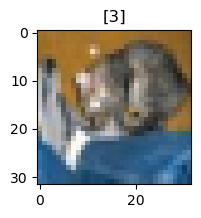

In [167]:
plt.figure(figsize=(15,2))
plt.imshow(testing_images[0])
plt.title(testing_labels[0])

Text(0.5, 1.0, '[8]')

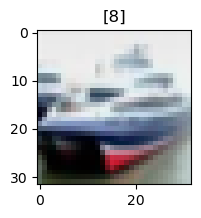

In [168]:
plt.figure(figsize=(15,2))
plt.imshow(testing_images[1])
plt.title(testing_labels[1])

Text(0.5, 1.0, '[0]')

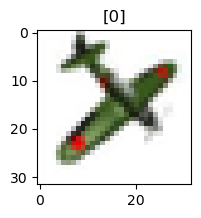

In [169]:
plt.figure(figsize=(15,2))
plt.imshow(testing_images[98])
plt.title(testing_labels[98])

In [170]:
testing_100=testing_labels[0:99].reshape(-1,)
testing_100

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0,
       4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6,
       0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2,
       1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7,
       8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0], dtype=uint8)

In [171]:
predicted_classes

array([3, 8, 8, 8, 4, 6, 3, 4, 4, 1, 8, 9, 5, 7, 1, 8, 5, 4, 8, 6, 4, 2,
       0, 9, 4, 6, 6, 4, 9, 6, 6, 4, 4, 5, 9, 1, 6, 9, 9, 5, 4, 6, 3, 4,
       0, 9, 5, 8, 4, 6, 9, 4, 6, 3, 8, 8, 5, 9, 6, 2, 4, 3, 1, 9, 6, 2,
       1, 2, 5, 7, 4, 6, 8, 8, 4, 2, 9, 3, 3, 8, 8, 1, 2, 5, 2, 7, 2, 0,
       8, 9, 0, 6, 8, 6, 4, 5, 4, 0, 2], dtype=int64)

In [172]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testing_100, predicted_classes)
accuracy

0.5555555555555556

## using adam 

In [174]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="softmax")])
ann.compile(optimizer="Adam",
           loss="sparse_categorical_crossentropy",metrics=["accuracy"])
ann.fit(training_images,training_labels,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 286s 182ms/step - loss: 1.8872 - accuracy: 0.3268
Epoch 2/5
1563/1563 [==============================] - 294s 188ms/step - loss: 1.6594 - accuracy: 0.4037
Epoch 3/5
1563/1563 [==============================] - 285s 182ms/step - loss: 1.5746 - accuracy: 0.4345
Epoch 4/5
1563/1563 [==============================] - 309s 198ms/step - loss: 1.5203 - accuracy: 0.4548
Epoch 5/5
1563/1563 [==============================] - 294s 188ms/step - loss: 1.4875 - accuracy: 0.4683


In [175]:
# Make predictions
pred= ann.predict(test100)

4/4 [==============================] - 0s 18ms/step


In [177]:
predicted_classes = np.argmax(pred, axis=1)
predicted_classes

array([3, 8, 8, 8, 4, 6, 5, 2, 3, 1, 0, 9, 6, 7, 1, 8, 5, 3, 8, 6, 9, 0,
       0, 9, 4, 6, 6, 0, 1, 6, 6, 2, 4, 6, 9, 1, 6, 9, 3, 8, 0, 6, 7, 6,
       0, 8, 3, 8, 4, 6, 9, 8, 6, 5, 8, 8, 7, 1, 6, 2, 4, 3, 6, 9, 6, 4,
       1, 2, 5, 9, 0, 7, 8, 8, 8, 4, 9, 5, 3, 8, 8, 1, 1, 0, 0, 7, 2, 8,
       8, 9, 0, 4, 8, 6, 4, 3, 4, 0, 0], dtype=int64)

In [178]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testing_100, predicted_classes)
accuracy

0.5252525252525253

### So we can see here using ANN the accuracy is very low ..now we will apply CNN techniques

In [179]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [181]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [182]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [184]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [189]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(training_images, training_labels, epochs=10, 
                    validation_data=(testing_images, testing_labels))

Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.5452 - accuracy: 0.4383 - val_loss: 1.3135 - val_accuracy: 0.5213
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2107 - accuracy: 0.5710 - val_loss: 1.1308 - val_accuracy: 0.6003
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0539 - accuracy: 0.6293 - val_loss: 1.0237 - val_accuracy: 0.6427
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9578 - accuracy: 0.6628 - val_loss: 1.0034 - val_accuracy: 0.6485
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8846 - accuracy: 0.6897 - val_loss: 0.9259 - val_accuracy: 0.6746
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8234 - accuracy: 0.7115 - val_loss: 0.8926 - val_accuracy: 0.6887
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7715 - accuracy: 0.7292 - val_loss: 0.9431 -

313/313 - 1s - loss: 0.8886 - accuracy: 0.7036 - 1s/epoch - 4ms/step


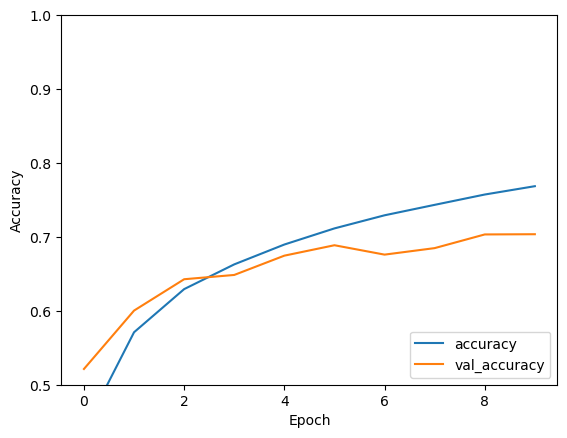

In [192]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testing_images,
                                     testing_labels,
                                     verbose=2)

In [193]:
print('Test Accuracy is',test_acc)

Test Accuracy is 0.7035999894142151
